In [1]:
import numpy as np
import matplotlib.pyplot as plt

[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]]
i= 0 	got stuck, 	fraction 0.0
i= 1000 	got stuck, 	fraction 0.5754245754245755
i=2000 	pass through. 	fraction 0.5902048975512244
i= 3000 	got stuck, 	fraction 0.5888037320893036
i= 4000 	got stuck, 	fraction 0.5948512871782055


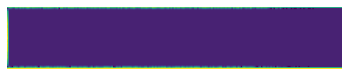

<Figure size 432x288 with 0 Axes>

2959 particles passed through out of 5000 SUCCESS PROBABILITY fraction 0.5918
code finished


In [2]:
# PARTS 1-4

IDL = 3

maxX = 200 + 5*IDL
maxY = 40
    
nParticles = 5000*1


def display(A,B):
    maxX = A.shape[0]
    maxY = A.shape[1]
    
    m2 = np.max(B)
    B[A[:,:]==1] = m2
    
    m1 = np.min(B[B[:,:]>0])
    if (m1==m2): m1=m2/2
    B[B[:,:]==0] = m1+(m1/m2)**(1/10)
    
    D = np.zeros((maxY, maxX))
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            D[maxY-1-iy,ix] = np.log(B[ix,iy])
            
    plt.imshow(D);
    plt.axis('off');
    plt.show()
    plt.draw()
    plt.pause(0.01)

A = np.zeros((maxX, maxY))


A[:,0] = 1
A[:,maxY-1] = 1

print(A.transpose())
B = A.copy()
    
    
plt.show()
plt.draw()

success=0
    
for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    xstart  = maxX-1; x = xstart # start at right of pipe
    ystart  = maxY//2; y = ystart # start at middle of pipe

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r < 0.1:
            x += 1
        if r >= 0.1 and r < 0.6:
            x -= 1
        if r >= 0.6 and r < 0.8:
            y += 1
        if r >= 0.8:    
            y -= 1
        #now apply periodic boundary conditions to 'x'
        if (x==maxX):
            x = xOrg;
            y = yOrg;
            continue
 
        if (x==0):
            success += 1
            B[x,y] += 1
            if (i%1000==0):
                print(f'i={i} \tpass through. \tfraction',success/(i+1))
            break
            

        if (A[(x+1)%maxX,y]+A[(x-1)%maxX,y]+A[x,y+1]+A[x,y-1]>0): 
            B[x,y] += 1
            if (i%1000==0): 
                print(f'i= {i} \tgot stuck, \tfraction',success/(i+1))
            break

display(A,B)
# Comment: The line beneath this comment states the success probability without any obstacles
print(success, 'particles passed through out of',nParticles,'SUCCESS PROBABILITY fraction',success/nParticles)
print('code finished')

[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]]
i=0 	pass through. 	fraction 1.0
i= 1000 	got stuck, 	fraction 0.6163836163836164
i=2000 	pass through. 	fraction 0.6106946526736632
i=3000 	pass through. 	fraction 0.599133622125958
i=4000 	pass through. 	fraction 0.596100974756311
i= 5000 	got stuck, 	fraction 0.5998800239952009
i= 6000 	got stuck, 	fraction 0.5975670721546409
i=7000 	pass through. 	fraction 0.5964862162548208
i=8000 	pass through. 	fraction 0.5946756655418073
i=9000 	pass through. 	fraction 0.5933785134985001
i=10000 	pass through. 	fraction 0.5929407059294071
i=11000 	pass through. 	fraction 0.5909462776111263
i=12000 	pass through. 	fraction 0.5901174902091493
i= 13000 	got stuck, 	fraction 0.5898007845550343
i= 14000 	got stuck, 	fraction 0.5893150489250768
i= 15000 	got stuck, 	fraction 0.5897606826211585
i= 16000 	got stuck, 	fraction 0.5892756702706081
i=17

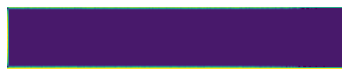

<Figure size 432x288 with 0 Axes>

11801 particles passed through out of 20000 SUCCESS PROBABILITY fraction 0.59005
code finished


In [3]:
# PART 5

IDL = 3
maxX = 200 + 5*IDL
maxY = 40
    
nParticles = 5000*4 # Comment: 20000 particles is the number of particles for the success probability to be within an accuracy of 2%


def display(A,B):
    maxX = A.shape[0]
    maxY = A.shape[1]
    
    m2 = np.max(B)
    B[A[:,:]==1] = m2
    
    m1 = np.min(B[B[:,:]>0])
    if (m1==m2): m1=m2/2
    B[B[:,:]==0] = m1+(m1/m2)**(1/10)
    
    D = np.zeros((maxY, maxX))
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            D[maxY-1-iy,ix] = np.log(B[ix,iy])
            
    plt.imshow(D);
    plt.axis('off');
    plt.savefig('final.png',bbox_inches='tight')
    plt.show()
    plt.draw()
    plt.pause(0.01)

A = np.zeros((maxX, maxY))


A[:,0] = 1
A[:,maxY-1] = 1

print(A.transpose())
B = A.copy()
    
plt.show()
plt.draw()

success=0
    
for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    xstart  = maxX-1; x = xstart # start at right of pipe
    ystart  = maxY//2; y = ystart # start at middle of pipe

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r < 0.1:
            x += 1
        if r >= 0.1 and r < 0.6:
            x -= 1
        if r >= 0.6 and r < 0.8:
            y += 1
        if r >= 0.8:    
            y -= 1
        #now apply periodic boundary conditions to 'x'
        if (x==maxX):
            x = xOrg;
            y = yOrg;
            continue
 
        if (x==0):
            success += 1
            B[x,y] += 1
            if (i%1000==0):
                print(f'i={i} \tpass through. \tfraction',success/(i+1))
            break
            

        if (A[(x+1)%maxX,y]+A[(x-1)%maxX,y]+A[x,y+1]+A[x,y-1]>0): 
            B[x,y] += 1
            if (i%1000==0): 
                print(f'i= {i} \tgot stuck, \tfraction',success/(i+1))
            break

display(A,B)
# Comment: The line beneath this comment states the success probability without any obstacles
print(success, 'particles passed through out of',nParticles,'SUCCESS PROBABILITY fraction',success/nParticles)
print('code finished')

[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]]
i= 0 	got stuck, 	fraction 0.0
i= 1000 	got stuck, 	fraction 0.016983016983016984
i= 2000 	got stuck, 	fraction 0.01999000499750125
i= 3000 	got stuck, 	fraction 0.021992669110296566
i= 4000 	got stuck, 	fraction 0.02424393901524619
i= 5000 	got stuck, 	fraction 0.022395520895820836
i= 6000 	got stuck, 	fraction 0.021163139476753873
i= 7000 	got stuck, 	fraction 0.020568490215683473
i= 8000 	got stuck, 	fraction 0.02062242219722535
i= 9000 	got stuck, 	fraction 0.020886568159093434
i= 10000 	got stuck, 	fraction 0.020397960203979604
i= 11000 	got stuck, 	fraction 0.01999818198345605
i= 12000 	got stuck, 	fraction 0.02016498625114574
i= 13000 	got stuck, 	fraction 0.019690793015921852
i= 14000 	got stuck, 	fraction 0.019498607242339833
i= 15000 	got stuck, 	fraction 0.019265382307846142
i= 16000 	got stuck, 	fraction 0.01881132429223

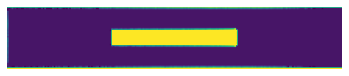

<Figure size 432x288 with 0 Axes>

390 particles passed through out of 20000 SUCCESS PROBABILITY fraction 0.0195
code finished


In [4]:
# PART 6

IDL = 3

maxX = 200 + 5*IDL
maxY = 40
    
nParticles = 5000*4


def display(A,B):
    maxX = A.shape[0]
    maxY = A.shape[1]
    
    
    
    m2 = np.max(B)
    B[A[:,:]==1] = m2
    
    m1 = np.min(B[B[:,:]>0])
    if (m1==m2): m1=m2/2
    B[B[:,:]==0] = m1+(m1/m2)**(1/10)
    
    D = np.zeros((maxY, maxX))
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            D[maxY-1-iy,ix] = np.log(B[ix,iy])
            
    plt.imshow(D);
    plt.axis('off');
    plt.savefig('finalRect.png',bbox_inches='tight')
    plt.show()
    plt.draw()
    plt.pause(0.01)

A = np.zeros((maxX, maxY))


A[:,0] = 1
A[:,maxY-1] = 1

# Obstacles

# Rectangle (9th digit = 3)
z = 5
A[maxX//2-8*z:maxX//2+8*z,maxY//2-1*z:maxY//2+1*z] = 1


print(A.transpose())
B = A.copy()
    
    
plt.show()
plt.draw()

success=0
    
for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    xstart  = maxX-1; x = xstart # start at right of pipe
    ystart  = maxY//2; y = ystart # start at middle of pipe

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r < 0.1:
            x += 1
        if r >= 0.1 and r < 0.6:
            x -= 1
        if r >= 0.6 and r < 0.8:
            y += 1
        if r >= 0.8:    
            y -= 1
        #now apply periodic boundary conditions to 'x'
        if (x==maxX):
            x = xOrg;
            y = yOrg;
            continue
 
        if (x==0):
            success += 1
            B[x,y] += 1
            if (i%1000==0):
                print(f'i={i} \tpass through. \tfraction',success/(i+1))
            break
            

        if (A[(x+1)%maxX,y]+A[(x-1)%maxX,y]+A[x,y+1]+A[x,y-1]>0): 
            B[x,y] += 1
            if (i%1000==0): 
                print(f'i= {i} \tgot stuck, \tfraction',success/(i+1))
            break

display(A,B)
# Comment: The line beneath this comment states the success probability with a rectangle obstacle
print(success, 'particles passed through out of',nParticles,'SUCCESS PROBABILITY fraction',success/nParticles)
print('code finished')

[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]]
i= 0 	got stuck, 	fraction 0.0
i= 1000 	got stuck, 	fraction 0.0
i= 2000 	got stuck, 	fraction 0.0
i= 3000 	got stuck, 	fraction 0.0
i= 4000 	got stuck, 	fraction 0.0
i= 5000 	got stuck, 	fraction 0.0
i= 6000 	got stuck, 	fraction 0.0
i= 7000 	got stuck, 	fraction 0.0
i= 8000 	got stuck, 	fraction 0.0
i= 9000 	got stuck, 	fraction 0.0
i= 10000 	got stuck, 	fraction 9.999000099990002e-05
i= 11000 	got stuck, 	fraction 9.09008271975275e-05
i= 12000 	got stuck, 	fraction 8.332638946754438e-05
i= 13000 	got stuck, 	fraction 7.691716021844474e-05
i= 14000 	got stuck, 	fraction 7.142346975216056e-05
i= 15000 	got stuck, 	fraction 6.666222251849876e-05
i= 16000 	got stuck, 	fraction 6.249609399412537e-05
i= 17000 	got stuck, 	fraction 0.0001176401388153638
i= 18000 	got stuck, 	fraction 0.00011110493861452142
i= 19000 	got stuck, 	fraction

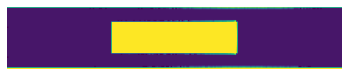

<Figure size 432x288 with 0 Axes>

2 particles passed through out of 20000 fraction 0.0001
code finished


In [5]:
# PART 7

IDL = 3

maxX = 200 + 5*IDL
maxY = 40
    
nParticles = 5000*4


def display(A,B):
    maxX = A.shape[0]
    maxY = A.shape[1]
    
    m2 = np.max(B)
    B[A[:,:]==1] = m2
    
    m1 = np.min(B[B[:,:]>0])
    if (m1==m2): m1=m2/2
    B[B[:,:]==0] = m1+(m1/m2)**(1/10)
    
    D = np.zeros((maxY, maxX))
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            D[maxY-1-iy,ix] = np.log(B[ix,iy])
            
    plt.imshow(D);
    plt.axis('off');
    plt.savefig('finalRectDoubleHeight.png',bbox_inches='tight')
    plt.show()
    plt.draw()
    plt.pause(0.01)

A = np.zeros((maxX, maxY))


A[:,0] = 1
A[:,maxY-1] = 1

# Obstacles

# Rectangle (9th digit = 3)
z = 5
A[maxX//2-8*z:maxX//2+8*z,maxY//2-2*z:maxY//2+2*z] = 1 #The constants that scale z in the Y direction are doubled


print(A.transpose())
B = A.copy()
    
    
plt.show()
plt.draw()

success=0
    
for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    xstart  = maxX-1; x = xstart # start at right of pipe
    ystart  = maxY//2; y = ystart # start at middle of pipe

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r < 0.1:
            x += 1
        if r >= 0.1 and r < 0.6:
            x -= 1
        if r >= 0.6 and r < 0.8:
            y += 1
        if r >= 0.8:    
            y -= 1
        #now apply periodic boundary conditions to 'x'
        if (x==maxX):
            x = xOrg;
            y = yOrg;
            continue
 
        if (x==0):
            success += 1
            B[x,y] += 1
            if (i%1000==0):
                print(f'i={i} \tpass through. \tfraction',success/(i+1))
            break
            

        if (A[(x+1)%maxX,y]+A[(x-1)%maxX,y]+A[x,y+1]+A[x,y-1]>0): 
            B[x,y] += 1
            if (i%1000==0): 
                print(f'i= {i} \tgot stuck, \tfraction',success/(i+1))
            break
            
display(A,B)
# Comment: The line beneath this comment states the success probability with a rectangle obstacle that is twice as tall
# Comment: The value of the success probability is significantly lower than before since very few particles will skew upwards or downwards quickly enough and maneuver past the obstacle and walls. Due to the very small amount, the success probability is very close to zero, unlike the success probability of a rectangle that is half this size and half as tall.
print(success, 'particles passed through out of',nParticles,'fraction',success/nParticles)
print('code finished')

[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]]
i= 0 	got stuck, 	fraction 0.0
i= 1000 	got stuck, 	fraction 0.0
i= 2000 	got stuck, 	fraction 0.0
i= 3000 	got stuck, 	fraction 0.0003332222592469177
i= 4000 	got stuck, 	fraction 0.000999750062484379
i= 5000 	got stuck, 	fraction 0.0007998400319936012
i= 6000 	got stuck, 	fraction 0.0008331944675887352
i= 7000 	got stuck, 	fraction 0.0008570204256534781
i= 8000 	got stuck, 	fraction 0.000999875015623047
i= 9000 	got stuck, 	fraction 0.0012220864348405733
i= 10000 	got stuck, 	fraction 0.0013998600139986002
i= 11000 	got stuck, 	fraction 0.0013635124079629125
i= 12000 	got stuck, 	fraction 0.00133322223148071
i= 13000 	got stuck, 	fraction 0.0013075917237135605
i= 14000 	got stuck, 	fraction 0.0013570459252910507
i= 15000 	got stuck, 	fraction 0.0012665822278514767
i= 16000 	got stuck, 	fraction 0.0013124179738766327
i= 17000 	got 

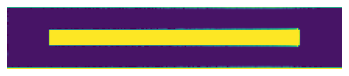

<Figure size 432x288 with 0 Axes>

27 particles passed through out of 20000 SUCCESS PROBABILITY fraction 0.00135
code finished


In [6]:
# PART 8

IDL = 3

maxX = 200 + 5*IDL
maxY = 40
    
nParticles = 5000*4


def display(A,B):
    maxX = A.shape[0]
    maxY = A.shape[1]
    
    m2 = np.max(B)
    B[A[:,:]==1] = m2
    
    m1 = np.min(B[B[:,:]>0])
    if (m1==m2): m1=m2/2
    B[B[:,:]==0] = m1+(m1/m2)**(1/10)
    
    D = np.zeros((maxY, maxX))
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            D[maxY-1-iy,ix] = np.log(B[ix,iy])
            
    plt.imshow(D);
    plt.axis('off');
    plt.savefig('finalRectDoubleLength.png',bbox_inches='tight')
    plt.show()
    plt.draw()
    plt.pause(0.01)

A = np.zeros((maxX, maxY))


A[:,0] = 1
A[:,maxY-1] = 1

# Obstacles

# Rectangle (9th digit = 3)
z = 5
A[maxX//2-16*z:maxX//2+16*z,maxY//2-1*z:maxY//2+1*z] = 1 #The constants that scale z in the X direction are doubled


print(A.transpose())
B = A.copy()
    
    
plt.show()
plt.draw()

success=0
    
for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    xstart  = maxX-1; x = xstart # start at right of pipe
    ystart  = maxY//2; y = ystart # start at middle of pipe

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r < 0.1:
            x += 1
        if r >= 0.1 and r < 0.6:
            x -= 1
        if r >= 0.6 and r < 0.8:
            y += 1
        if r >= 0.8:    
            y -= 1
        #now apply periodic boundary conditions to 'x'
        if (x==maxX):
            x = xOrg;
            y = yOrg;
            continue
 
        if (x==0):
            success += 1
            B[x,y] += 1
            if (i%1000==0):
                print(f'i={i} \tpass through. \tfraction',success/(i+1))
            break
            

        if (A[(x+1)%maxX,y]+A[(x-1)%maxX,y]+A[x,y+1]+A[x,y-1]>0): 
            B[x,y] += 1
            if (i%1000==0): 
                print(f'i= {i} \tgot stuck, \tfraction',success/(i+1))
            break

display(A,B)
# Comment: The line beneath this comment states the success probability with a rectangle obstacle that is twice as tall
# Comment: The value of the success probability is significantly lower than before since very few particles will skew upwards or downwards quickly enough and maneuver past the obstacle and walls. The gap between the obstacle and walls is larger than the prior instance where the obstacle was twice as tall, but the distance the particle must travel within this confined distance is larger as well. The success probability tends to be higher than in question 7, but it is still significantly smaller than the success probability in question 6. The success probability is very close to zero, unlike the success probability of a rectangle that is half this size and half as long.
print(success, 'particles passed through out of',nParticles,'SUCCESS PROBABILITY fraction',success/nParticles)
print('code finished')